## Task2 Color Identification in Images using ML and Image Processing

## Ahmed Mady, The Sparks Foudation, Computer Vision Intern

## Import Libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans # for Ml 
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2

## Set the Plot Settings

In [2]:
def set_style():
    plt.style.use('ggplot')
    plt.rcParams['font.family'] = 'sans-serif' 
    plt.rcParams['font.serif'] = 'Ubuntu' 
    plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
    plt.rcParams['font.size'] = 14 
    plt.rcParams['axes.labelsize'] = 12 
    plt.rcParams['axes.labelweight'] = 'bold' 
    plt.rcParams['axes.titlesize'] = 12 
    plt.rcParams['xtick.labelsize'] = 12 
    plt.rcParams['ytick.labelsize'] = 12 
    plt.rcParams['legend.fontsize'] = 12 
    plt.rcParams['figure.titlesize'] = 12 
    plt.rcParams['image.cmap'] = 'jet' 
    plt.rcParams['image.interpolation'] = 'none' 
    plt.rcParams['figure.figsize'] = (10, 10) 
    plt.rcParams['axes.grid']=False
    plt.rcParams['lines.linewidth'] = 2 
    plt.rcParams['lines.markersize'] = 8
    colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
    'xkcd:scarlet']

## K Means Machine Learning Algorithm

In [3]:
# Considering this vector, it is possible to apply the K Means 
# algorithm and identify k clusters, that will be our colors.

def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# converts to a hexadecimal color code in the format "#RRGGBB.
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

def fit(image_path,number_of_colors):
    image = get_image(image_path)
    modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
    clf = KMeans(n_clusters = number_of_colors) # call K Means method
    labels = clf.fit_predict(modified_image) # predict the colors
    return clf, labels

def calculate_colors(clf, labels):
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    
    plt.title('Colors Detection', fontsize=20)
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,  autopct='%1.1f%%')
    #plt.savefig('images/res/pie_chart3.jpg', format='jpg')

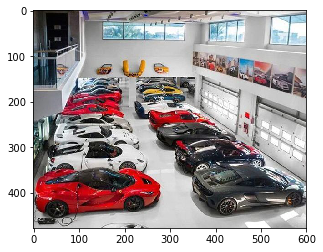

In [4]:
# Enter the path to the image and the max number of colors need to be found
image_path = 'images/test/1.jpg' 
image1 = cv2.imread(image_path)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
set_style()

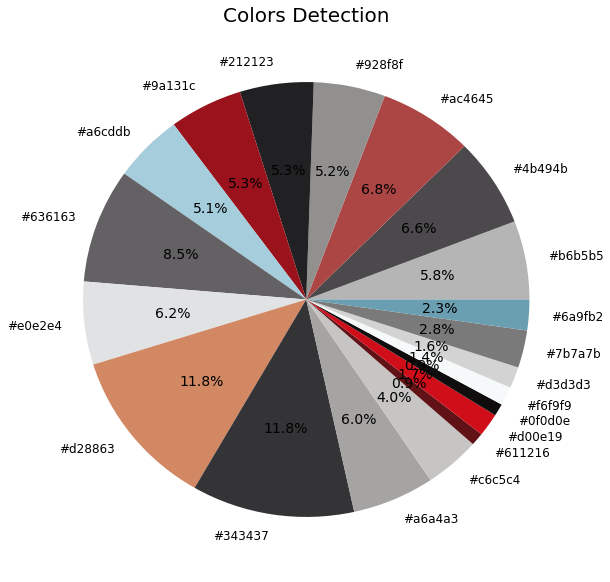

In [5]:
clf, labels = fit(image_path,20)
calculate_colors(clf, labels)

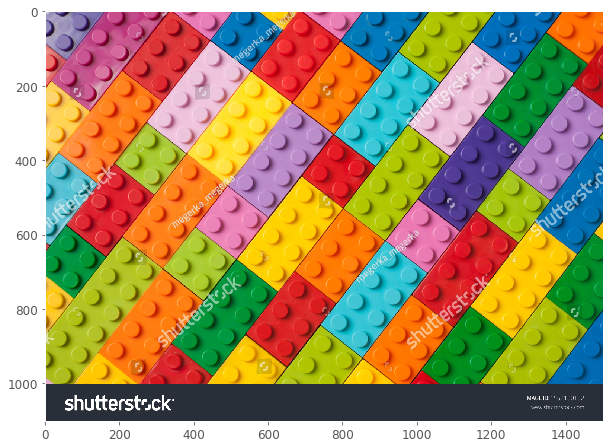

In [6]:
# Enter the path to the image and the max number of colors need to be found
image_path = 'images/test/2.jpg' 
image2 = cv2.imread(image_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2)
set_style()

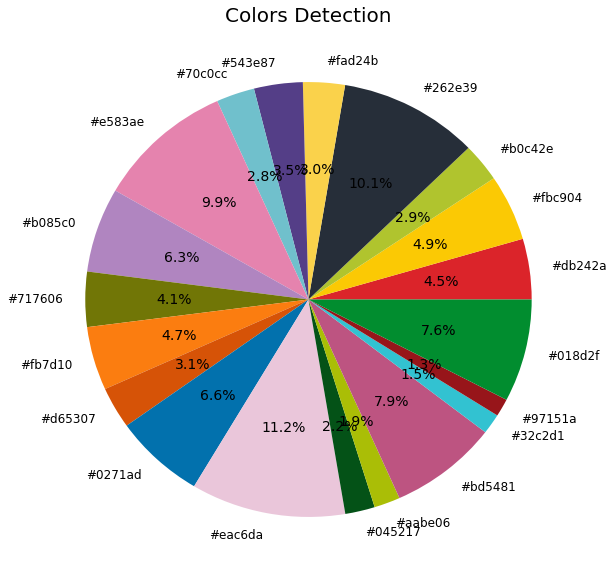

In [7]:
clf, labels = fit(image_path,20)
calculate_colors(clf, labels)

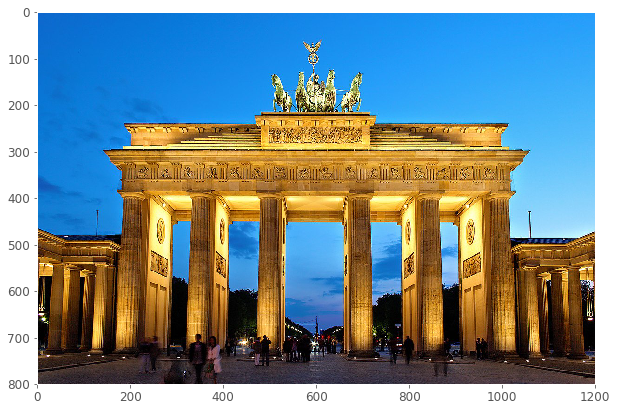

In [8]:
# Enter the path to the image and the max number of colors need to be found
image_path = 'images/test/3.jpg' 
image3 = cv2.imread(image_path)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
plt.imshow(image3)
set_style()

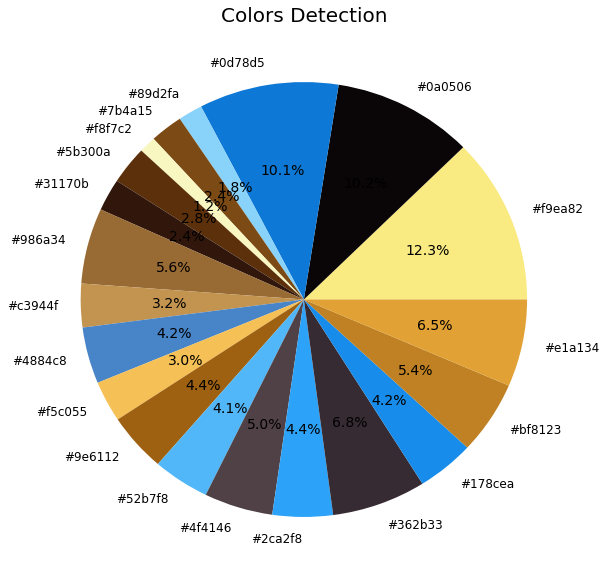

In [9]:
clf, labels = fit(image_path,20)
calculate_colors(clf, labels)